In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-full-csv/bank-full.csv


- Name: **Ene-Obong Daniella**
- Email address: **daniella.e.eneobong@gmail.com**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/bank-full-csv/bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

According to the info above, all columns have 45211 values with no null values present in the dataset.

In [6]:
df['y'] = df['y'].replace(['yes', 'no'], [1, 0])

'yes' and 'no' in column 'y' is replaced with 0 and 1 to increase the efficiency of the analysis.

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


# Distribution EDA

## Numeric columns

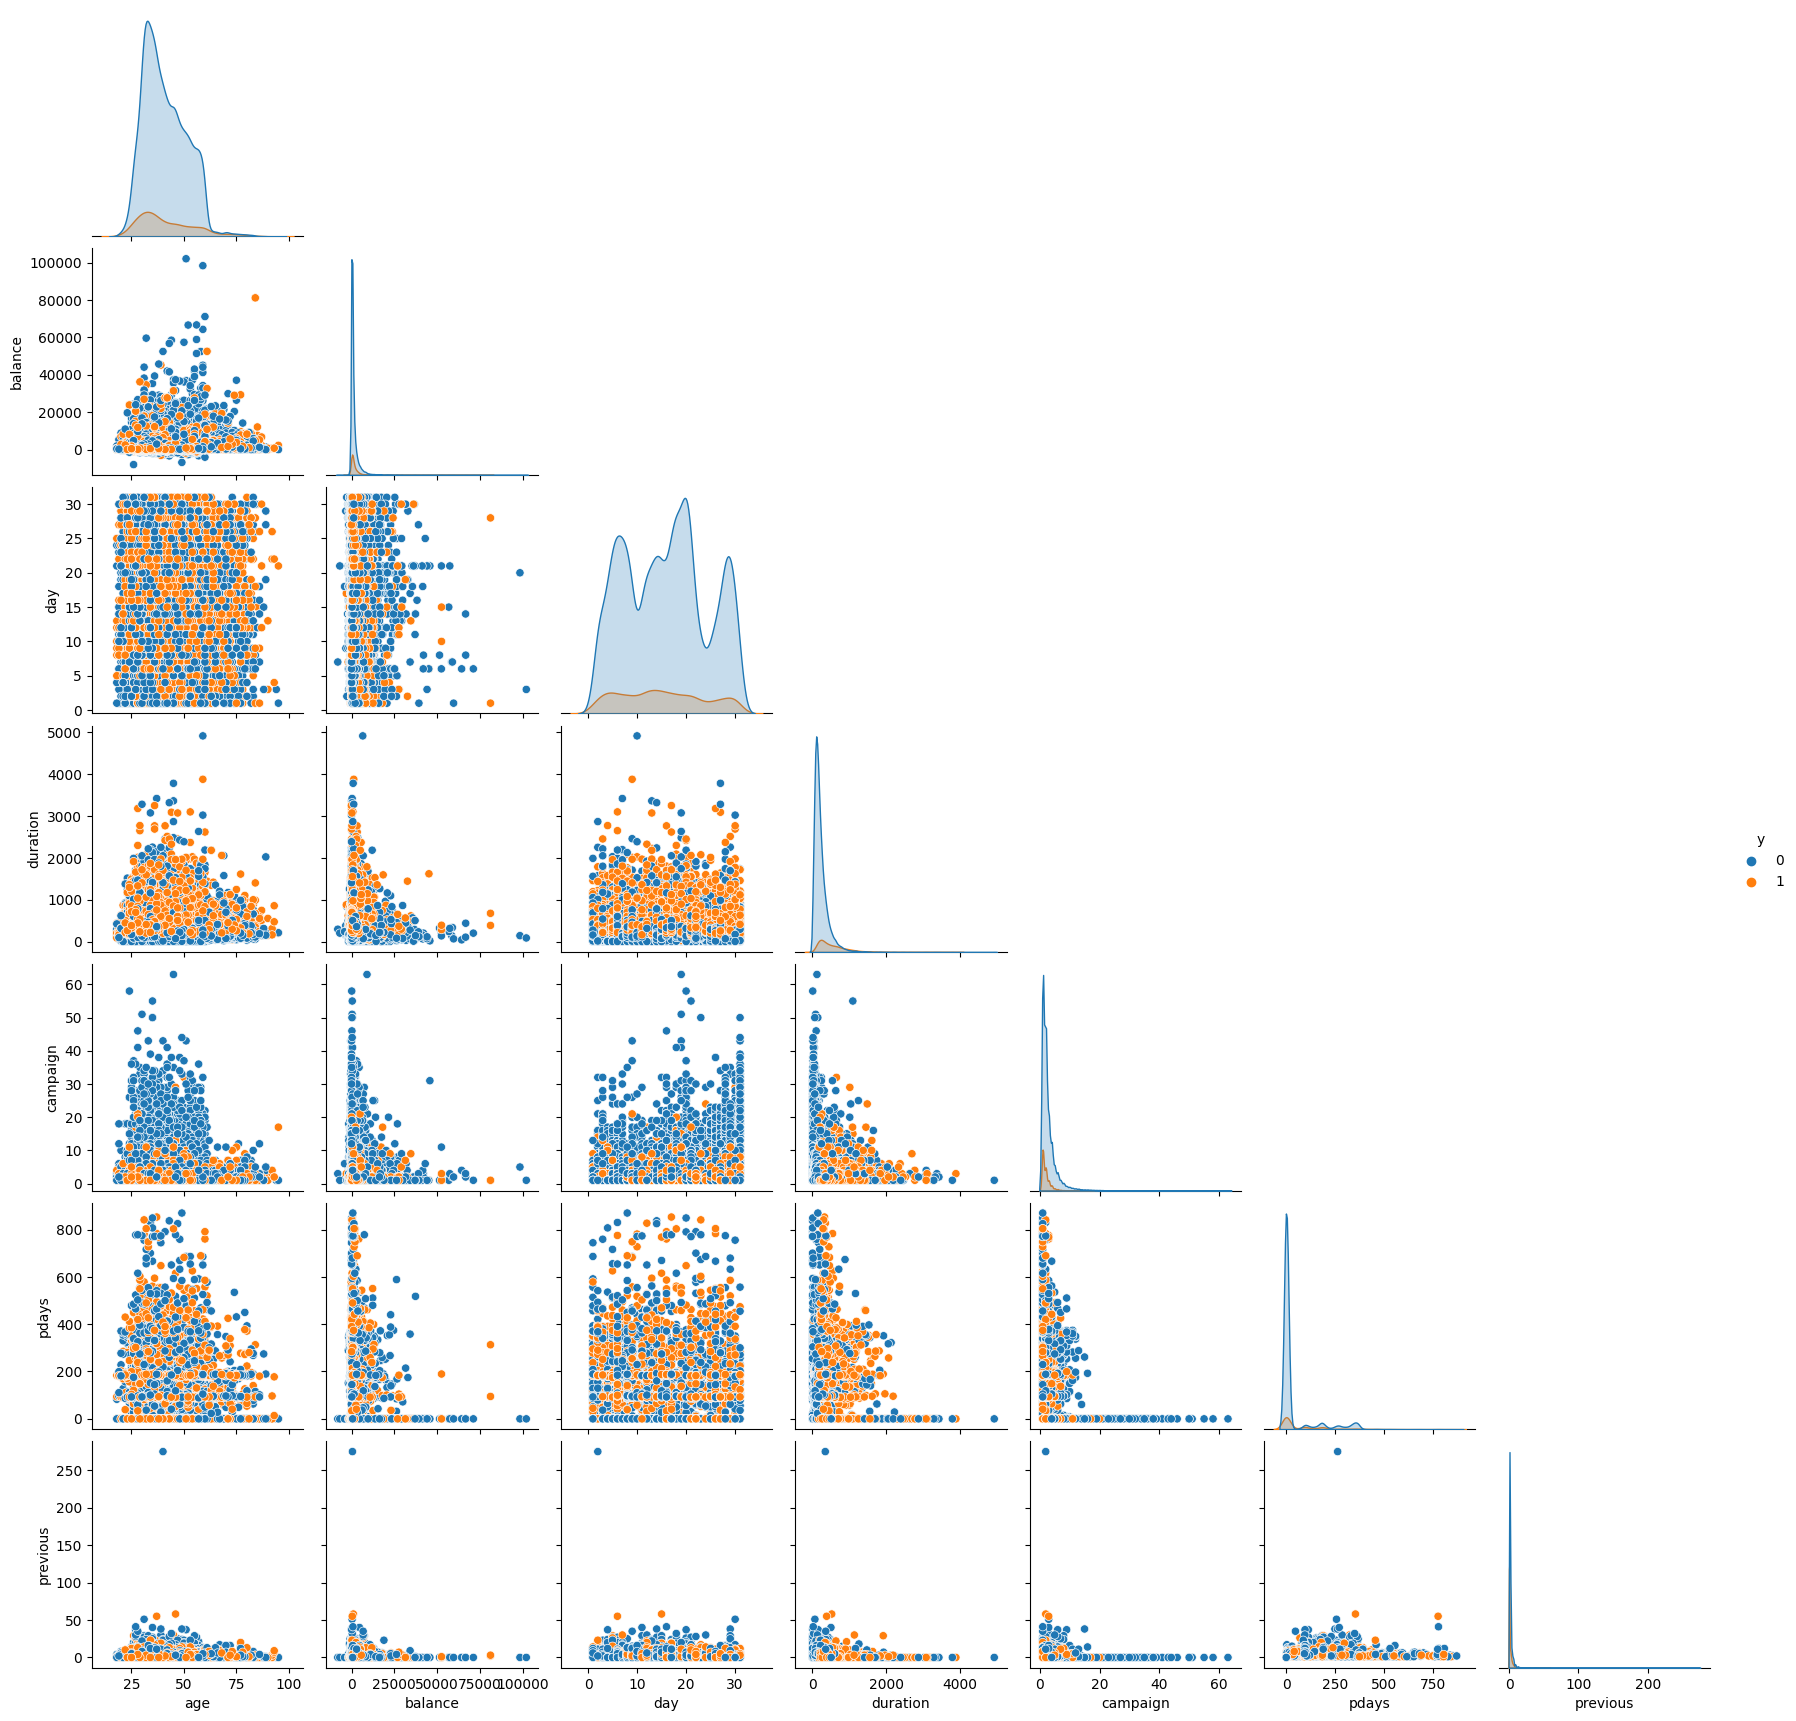

In [8]:
sns.pairplot(df, hue='y', corner=True)

- balance, duration, campaign, pdays and previous columns are very skewed to the left.
- age column has a mildly skewed distribution.
- day column has a quite a spread out distribution.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

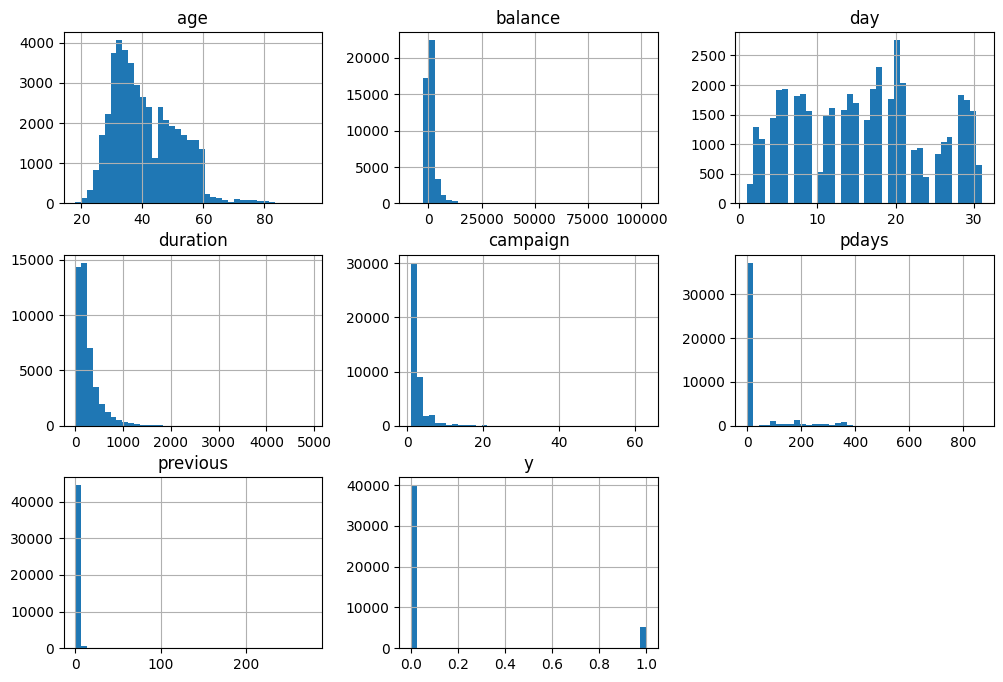

In [9]:
numeric = df._get_numeric_data().columns
df[numeric].hist(bins=40, figsize=(12, 8))

## Plot of percentages

In [10]:
def object_percent(col, ax=None):
    percentage = df[col].value_counts(normalize=True) * 100
    
    if ax is None:
        # Create a new figure if no axis is provided
        fig, ax = plt.subplots(figsize=(6, 4))
        plt.tight_layout()
    
    percentage.plot(kind='barh', ax=ax)
    bars = ax.containers[0]
    formatted_labels = [f"{pct:.1f}%" for pct in percentage.values]
    
    ax.set_xlabel('Percentage(%)', fontsize=12)
    ax.set_title(f'Percentage of Values in {col}', fontsize=14)
    ax.bar_label(bars, formatted_labels)
    
    plt.tight_layout()

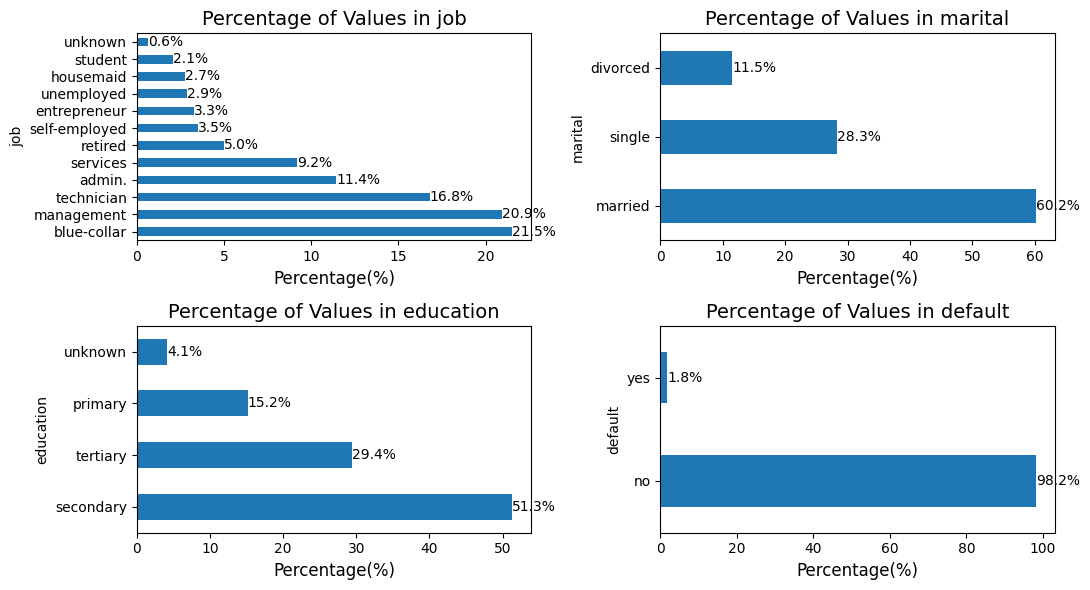

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 6))
object_percent('job', ax=ax1)
object_percent('marital', ax=ax2)
object_percent('education', ax=ax3)
object_percent('default', ax=ax4)

A majority of the subscribers are married, blue-collar or management, completed secondary education and did not default.

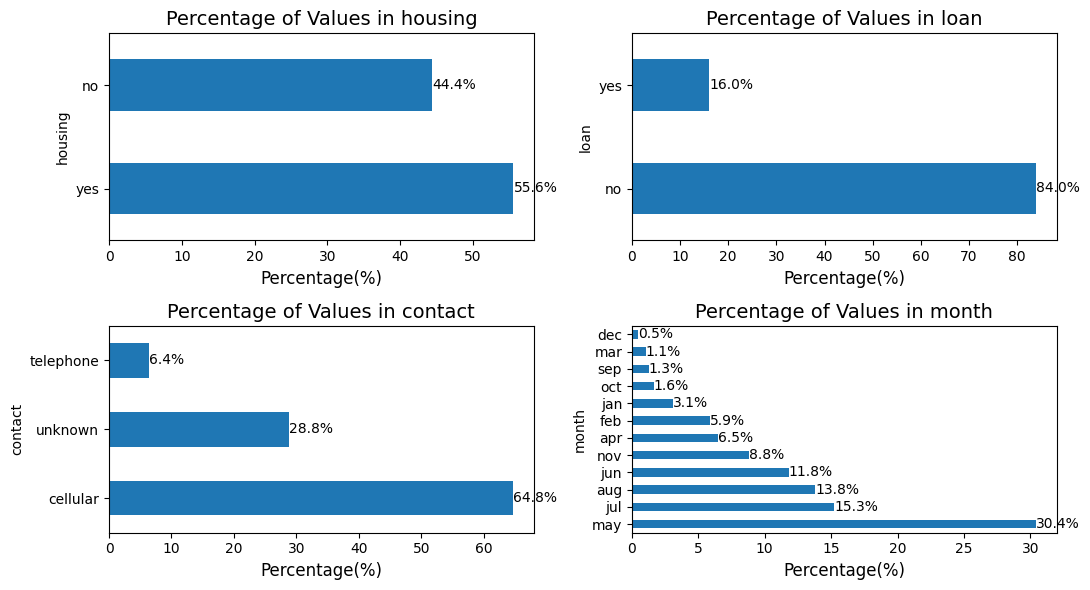

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 6))
object_percent('housing', ax=ax1)
object_percent('loan', ax=ax2)
object_percent('contact', ax=ax3)
object_percent('month', ax=ax4)

The month of may had an outrageous amount of subscriptions the reasons for which could be further analysed.

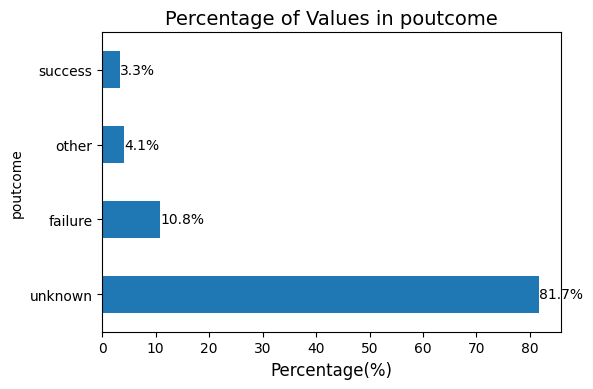

In [13]:
object_percent('poutcome')

# Overall relationship EDA

## Pie chart

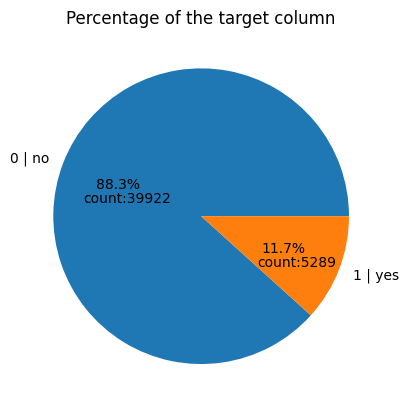

In [14]:
y_count = df['y'].value_counts().sort_values(ascending=False)
y_percent = (y_count/len(df)) * 100

plt.pie(y_percent, labels=['0 | no', '1 | yes'], autopct='%1.1f%%')
plt.title('Percentage of the target column')
plt.text(x=-0.5, y=0.12, s='count:' + str(y_count[0]) + '', color='black', ha='center', va='center')
plt.text(x=0.65, y=-0.31, s='count:' + str(y_count[1]) + '', color='black', ha='center', va='center')
plt.show()

## Histogram plot with kde and Scatterplot

In [15]:
def relationships(col1, col2):
    data = df[[col1, col2, 'y']]
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # Histogram plot of the distribution
    sns.histplot(data, x=col1, bins=20, hue='y', kde=True, ax=axes[0, 0])
    axes[0, 0].legend('Subscribed?', loc='upper right', labels = ['yes', 'no'], ncol=2, bbox_to_anchor=(1.18, 1.25))
    
    # Scatterplot distribution
    sns.scatterplot(data, x=col1, y=col2, hue='y', ax=axes[0, 1])
    
    # Box plot with col2 on the y-axis
    sns.boxplot(data, x=col1, y=col2, hue='y', ax=axes[1, 0])
    # Adjust graph title by col2 title
    axes[1, 0].set_title(f'{col2} Distribution by Subscription')
    
    # Kde plot of the distribution
    sns.kdeplot(data[data['y']==0], label='no', ax=axes[1, 1])
    sns.kdeplot(data[data['y']==1], label='yes', ax=axes[1, 1])
    axes[1, 1].legend('Subscription Status')
    axes[1, 1].set_title('Distribution of Target Variable')
    
    plt.tight_layout()
    return

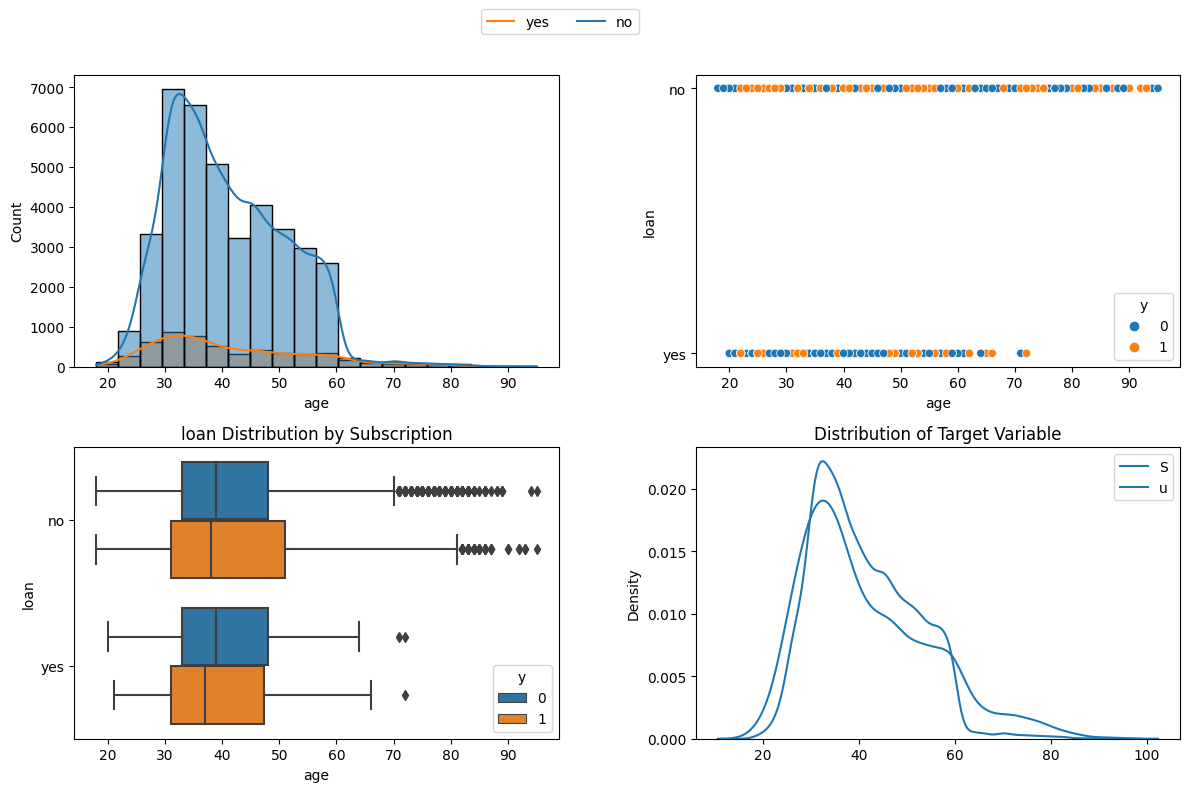

In [16]:
relationships('age', 'loan')

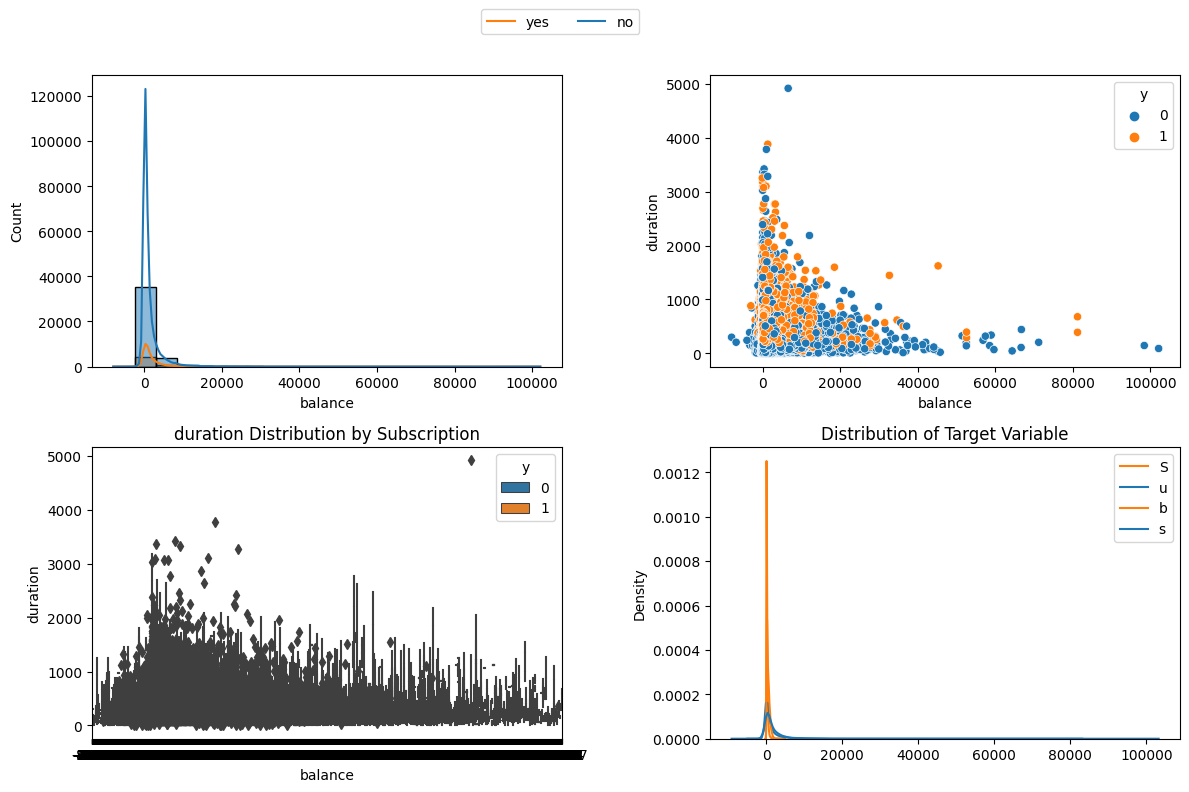

In [17]:
relationships('balance', 'duration')

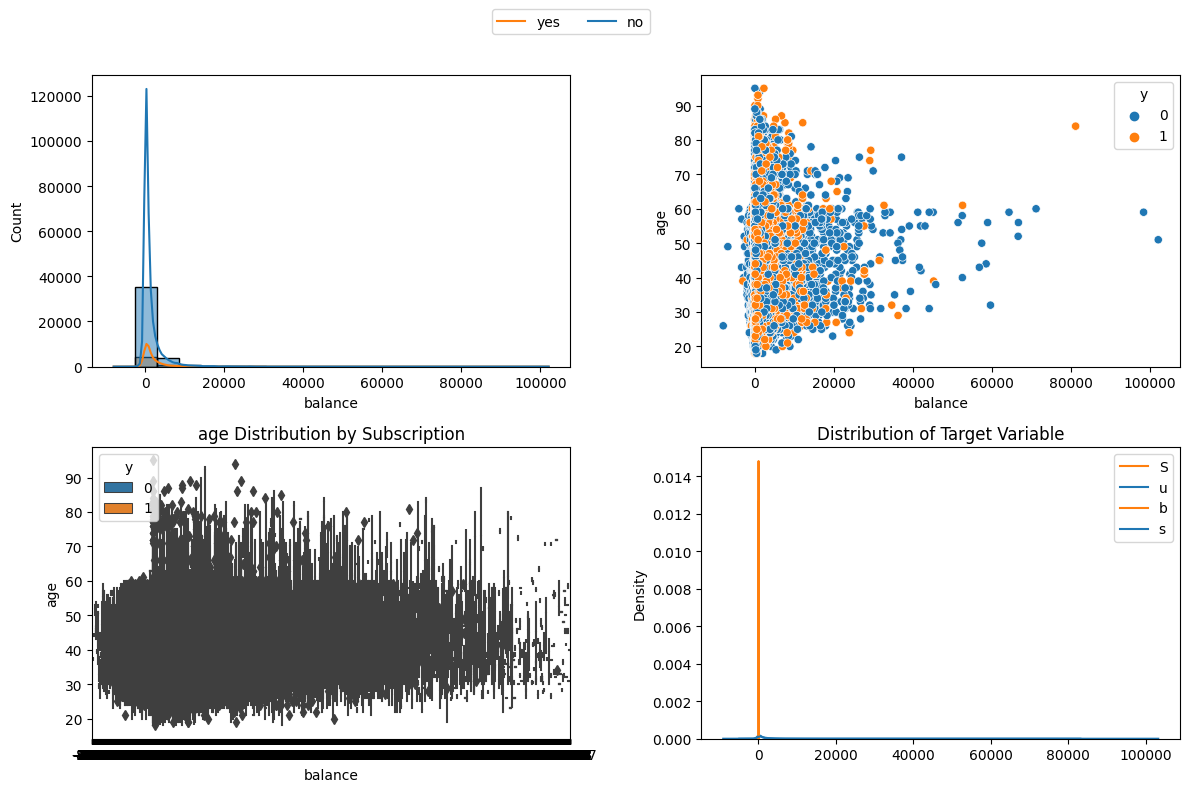

In [19]:
relationships('balance', 'age')

## Correlation coefficient

Text(0.5, 1.0, 'Correlation Matrix')

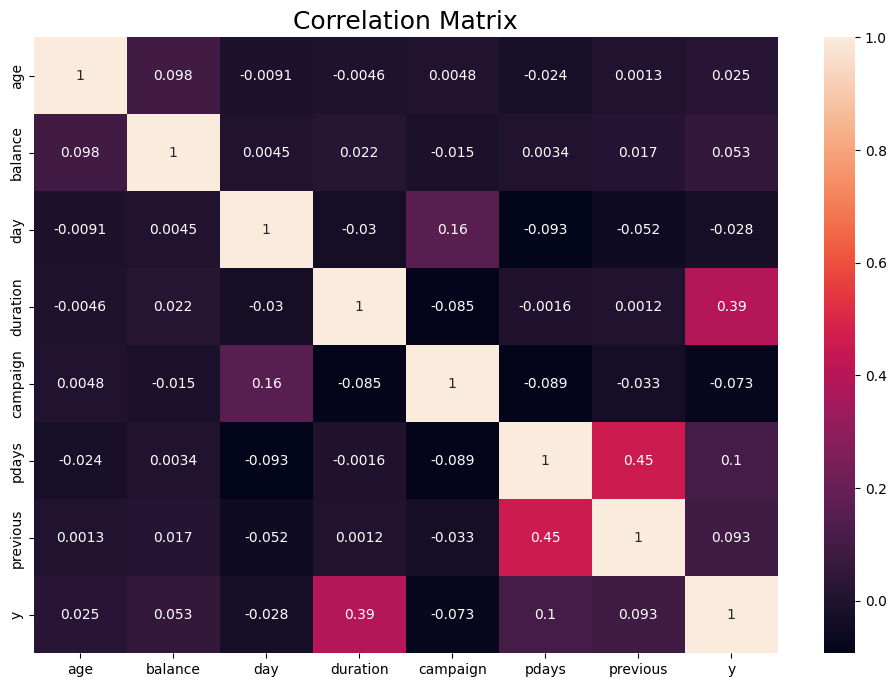

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric].corr(), annot=True)
plt.title('Correlation Matrix', size=18)

# Outliers

In [21]:
def outliers(col, method='zscore', threshold=3):

  if method == 'zscore':
    z_scores = stats.zscore(df[col])
    outliers = np.abs(z_scores) > threshold
    return outliers

  elif method == 'iqr':
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = (df[col] < (q1 - threshold * iqr)) | (df[col] > (q3 + threshold * iqr))
    return outliers
    
  elif method == 'boxplot':
    import matplotlib.pyplot as plt
    plt.boxplot(df[col])
    plt.show()
    outliers = None
    
  else:
    raise ValueError("Invalid method. Choose 'zscore', 'iqr', or 'boxplot'.")

  return outliers

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [23]:
outliers('balance', method='iqr').any()

True

In [24]:
balance_iqr_outliers = outliers('balance', method='iqr')
print(df.loc[balance_iqr_outliers].index)

Index([   34,    65,    69,    70,   205,   334,   382,   391,   446,   757,
       ...
       45020, 45075, 45076, 45097, 45098, 45110, 45118, 45127, 45181, 45208],
      dtype='int64', length=2443)


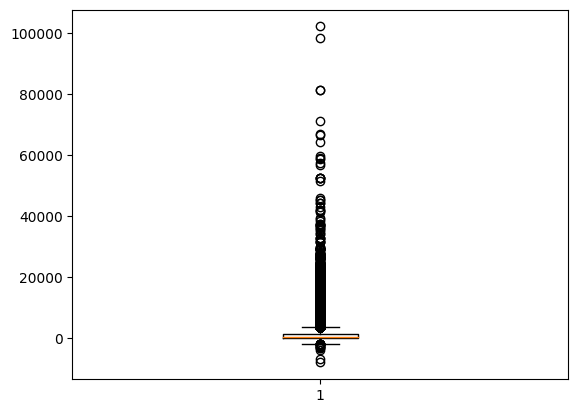

In [25]:
outliers('balance', 'boxplot')

In [ ]:
outliers('duration').any()

In [ ]:
outliers('duration', method='boxplot')

In [ ]:
sns.boxplot(x = balance_iqr_outliers.index, y = df['balance'])
plt.show()

## **How I would handle the dataset**
1. Removing the outliers: I would remove the potential outliers that have been identified. Of course, I would have determined that the data points being removed are errors or just irrelevant and would notreduce the variability of the dataset.
2. Replacing extreme values: I would replace the values below the q1 and the values above the q2 with the respective values for q1 and q2. This would ensure that the values are closer to the rest of the data.
3. Capping: This would also involve replacing extreme values but by setting a cap which the values cannot exceed both maximally and minimally.

## ** Outliers in the balance column**
Potential outliers were identified in the balance column using the iqr and z-score methods as well as manually examining the box plot. Hence, removing these data ponts with z-scores exceeding 3 for example, would likely improve the quality of the data as these data point are likely errors or extremes. After the outliers have been handled, an analysis would be performed to actually determine how affected the dataset would be.

## **Note:**
The function checks the method argument and performs outlier detection based on the chosen method:
-zscore: Calculates z-scores using scipy.stats.zscore and identifies data points with absolute z-scores exceeding the threshold (default 3).
-iqr: Calculates Interquartile Range (IQR) and identifies points outside the range of Q1 - threshold * IQR and Q3 + threshold * IQR.
-boxplot: Creates a boxplot using matplotlib.pyplot.boxplot for visual identification of outliers (further logic needed to automate outlier identification from the plot).